In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

def save_fig(fig_name, tight_layout=True):
    path = os.path.join('Figures', fig_name + '.png')
    print('Saving figure', fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

wavelength = pd.read_csv("binary/Wavelength.csv", header=None)
wavelength_list = []
for wl in wavelength[0]:
    name = "wl_" + str(wl)
    wavelength_list.append(name)
df = pd.read_csv('binary/X.csv', header=None, names=wavelength_list)
y = pd.read_csv('binary/y.csv', header=None)
df['y'] = y

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 922 entries, wl_420.852 to y
dtypes: float64(921), int64(1)
memory usage: 1.3 MB


In [123]:
df.describe()

wl_420.852  wl_421.228  wl_421.605  wl_421.98199999999997  wl_422.358  \
count  180.000000  180.000000  180.000000             180.000000  180.000000   
mean    -7.285778   26.623167  -39.141444              31.432056   19.583389   
std     28.066784   38.301483   38.125418              16.871401   19.078221   
min    -74.140000  -92.590000 -143.410000             -13.050000  -25.910000   
25%    -24.740000    2.035000  -63.590000              19.257500    6.325000   
50%     -8.725000   28.960000  -35.035000              31.315000   18.445000   
75%     11.212500   52.927500  -12.890000              44.292500   34.950000   
max     71.960000  145.480000   58.810000              72.410000   66.890000   

       wl_422.735  wl_423.111  wl_423.48800000000006  wl_423.86400000000003  \
count  180.000000  180.000000             180.000000             180.000000   
mean   -27.309889   -1.363278              16.758222              -1.462556   
std     25.123531   28.830671              24.518862              24.424941   
min    -87.240000  -72.790000             -64.190000             -79.430000   
25%    -41.460000  -20.357500               2.350000             -15.630000   
50%    -27.265000   -1.695000              16.980000               0.300000   
75%     -8.497500   19.560000              35.207500              14.840000   
max     47.220000   82.840000              79.350000              71.910000   

       wl_424.241     ...      wl_748.2339999999999  wl_748.573  \
count  180.000000     ...                180.000000  180.000000   
mean    20.104333     ...                 -0.391444    6.723667   
std     22.169355     ...                 27.783458   32.377364   
min    -44.400000     ...                -45.670000  -50.880000   
25%      5.200000     ...                -24.952500  -23.310000   
50%     19.925000     ...                 -5.640000    4.385000   
75%     33.822500     ...                 25.162500   36.692500   
max     75.150000     ...                 48.820000   66.170000   

       wl_748.9110000000001   wl_749.25  wl_749.5889999999999  wl_749.928  \
count            180.000000  180.000000            180.000000  180.000000   
mean             -10.397389    6.965833            -17.164222    2.614111   
std               34.395392   35.424993             42.765649   33.565696   
min              -70.100000  -64.090000            -92.670000  -59.460000   
25%              -44.620000  -25.830000            -59.050000  -26.330000   
50%              -10.635000    5.745000            -18.400000   -2.005000   
75%               21.817500   39.475000             20.445000   32.507500   
max               57.770000   71.210000             56.550000   68.440000   

       wl_750.2669999999999  wl_750.605  wl_750.944           y  
count            180.000000  180.000000  180.000000  180.000000  
mean              -0.534778    7.659167   27.403722    0.500000  
std               30.336068   23.692330   20.522360    0.501395  
min              -55.220000  -37.350000  -12.100000    0.000000  
25%              -27.592500  -13.342500    8.255000    0.000000  
50%                0.430000    8.120000   29.080000    0.500000  
75%               26.692500   29.067500   45.830000    1.000000  
max               62.360000   47.640000   65.770000    1.000000  

[8 rows x 922 columns]

In [124]:
corr_matrix = df.corr()
corr_matrix["y"].sort_values(ascending=False)

y                       1.000000
wl_640.534              0.996882
wl_640.888              0.996760
wl_653.93               0.996681
wl_668.312              0.996675
wl_638.7669999999999    0.996674
wl_649.707              0.996612
wl_657.796              0.996604
wl_644.771              0.996576
wl_637.352              0.996551
wl_654.633              0.996550
wl_646.535              0.996542
wl_645.477              0.996515
wl_653.227              0.996507
wl_665.1610000000001    0.996495
wl_630.9780000000001    0.996490
wl_643.36               0.996465
wl_655.688              0.996462
wl_638.413              0.996443
wl_635.229              0.996422
wl_634.521              0.996411
wl_643.7130000000001    0.996399
wl_633.813              0.996375
wl_658.1469999999999    0.996373
wl_650.059              0.996369
wl_649.002              0.996368
wl_657.445              0.996355
wl_651.115              0.996354
wl_652.1709999999999    0.996336
wl_666.9119999999999    0.996335
          

Saving figure binary_corr


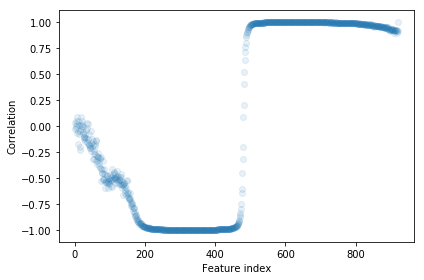

In [125]:
index = [i for i in range(len(corr_matrix))]
plt.scatter(index, corr_matrix["y"], alpha=0.1)
plt.xlabel("Feature index")
plt.ylabel("Correlation")
save_fig("binary_corr")
plt.show()

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["y"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
print(train_set["y"].value_counts() / len(train_set))
print(test_set["y"].value_counts() / len(test_set))

1    0.5
0    0.5
Name: y, dtype: float64
1    0.5
0    0.5
Name: y, dtype: float64


In [127]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def select_features(train_set, feature_names, n_features):
    # use logistic regression as an estimator
    model = LogisticRegression()
    rfe = RFE(model, n_features)
    fit = rfe.fit(train_set.drop("y", axis=1), train_set["y"])
    selected_features = []
    for feature, selected in zip(feature_names, fit.support_):
        if selected:
            selected_features.append(feature)
    return selected_features

In [128]:
selected_features = select_features(train_set, wavelength_list, 5)
print("Selected features: ", selected_features)
train_set = train_set[selected_features+["y"]]
train_set.head()

Selected features:  ['wl_738.383', 'wl_742.1239999999999', 'wl_746.877', 'wl_748.9110000000001', 'wl_749.5889999999999']


wl_738.383  wl_742.1239999999999  wl_746.877  wl_748.9110000000001  \
57        -0.54                -57.61      -22.86                -29.85   
101      -15.59                -68.89      -43.65                -16.74   
144      -29.82                -47.39      -47.40                -59.96   
64        25.40                 13.27       53.64                 -3.38   
104      -30.52                -31.95      -33.49                -48.41   

     wl_749.5889999999999  y  
57                 -66.76  0  
101                -49.49  0  
144                -49.42  0  
64                   7.61  1  
104                -71.49  0

Saving figure binary_matrix


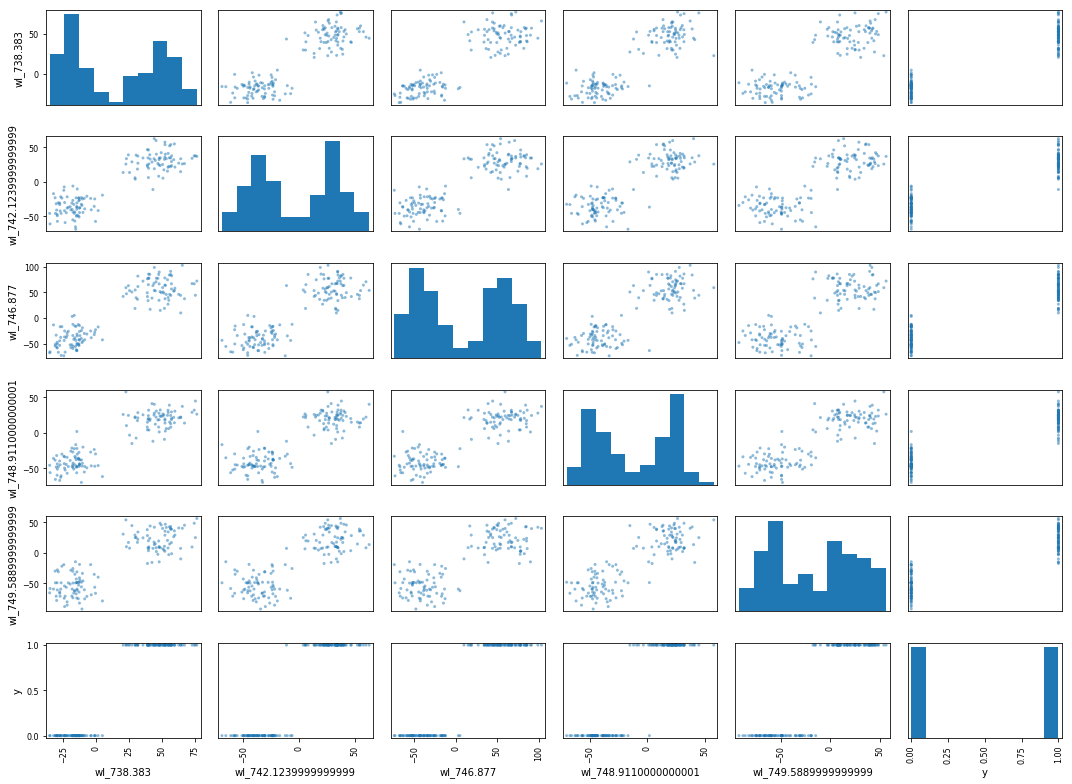

In [129]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set, figsize=(15, 11))
save_fig("binary_matrix")

In [130]:
wavelength = pd.read_csv("multiclass/Wavelength.csv", header=None)
wavelength_list = []
for wl in wavelength[0]:
    name = "wl_" + str(wl)
    wavelength_list.append(name)
multiclass_df = pd.read_csv('multiclass/X.csv', header=None, names=wavelength_list)
multiclass_y = pd.read_csv('multiclass/y.csv', header=None)
multiclass_df['y'] = multiclass_y

In [131]:
multiclass_df.describe()

wl_420.852  wl_421.228  wl_421.605  wl_421.98199999999997  wl_422.358  \
count  450.000000  450.000000  450.000000             450.000000  450.000000   
mean     0.831778   36.078489  -29.759578              36.237622   24.554111   
std     28.661154   38.447405   40.636535              17.290104   20.467866   
min    -74.140000  -92.590000 -143.410000             -13.050000  -32.810000   
25%    -18.747500    9.965000  -56.740000              25.737500   10.487500   
50%      0.620000   37.705000  -29.555000              35.720000   24.200000   
75%     19.420000   60.480000   -2.220000              47.747500   38.565000   
max     75.490000  157.780000   99.110000              97.300000   81.810000   

       wl_422.735  wl_423.111  wl_423.48800000000006  wl_423.86400000000003  \
count  450.000000  450.000000             450.000000             450.000000   
mean   -19.815911    5.518956              24.440200               6.366400   
std     25.229021   29.500466              26.104627              26.060944   
min    -87.240000  -72.790000             -64.190000             -79.430000   
25%    -36.810000  -14.835000               7.092500             -11.870000   
50%    -20.545000    5.030000              25.905000               5.090000   
75%     -4.895000   27.130000              43.212500              23.150000   
max     49.170000   85.030000             111.630000             109.890000   

       wl_424.241     ...      wl_748.2339999999999  wl_748.573  \
count  450.000000     ...                450.000000  450.000000   
mean    27.666489     ...                  9.799378   18.105222   
std     24.427463     ...                 34.860937   38.391676   
min    -44.400000     ...                -57.770000  -57.650000   
25%     10.972500     ...                -25.557500  -20.912500   
50%     27.085000     ...                 22.170000   31.490000   
75%     43.130000     ...                 39.067500   51.440000   
max    119.380000     ...                 71.670000   81.130000   

       wl_748.9110000000001   wl_749.25  wl_749.5889999999999  wl_749.928  \
count            450.000000  450.000000            450.000000  450.000000   
mean               3.752111   20.738556             -0.286733   14.574533   
std               42.098634   43.066364             52.972575   39.282065   
min              -76.860000  -64.200000           -103.700000  -60.730000   
25%              -42.067500  -25.817500            -55.842500  -24.437500   
50%               20.280000   34.925000             15.695000   28.485000   
75%               38.925000   56.170000             43.917500   48.262500   
max               75.300000  101.200000            113.160000   86.910000   

       wl_750.2669999999999  wl_750.605  wl_750.944           y  
count            450.000000  450.000000  450.000000  450.000000  
mean              10.990689   16.554711   35.873378    2.000000  
std               37.350340   28.352641   25.125371    1.415788  
min              -73.420000  -38.540000  -15.760000    0.000000  
25%              -26.797500  -11.785000    9.552500    1.000000  
50%               22.535000   25.825000   43.090000    2.000000  
75%               42.695000   40.265000   57.110000    3.000000  
max               78.080000   74.620000   89.020000    4.000000  

[8 rows x 922 columns]

In [132]:
corr_matrix = multiclass_df.corr()
corr_matrix["y"].sort_values(ascending=False)

y                        1.000000
wl_619.967               0.957703
wl_621.39                0.957656
wl_622.101               0.957351
wl_620.323               0.957346
wl_621.034               0.957239
wl_621.746               0.957156
wl_618.899               0.956999
wl_620.678               0.956978
wl_619.611               0.956913
wl_619.255               0.956568
wl_622.457               0.956510
wl_618.543               0.956413
wl_622.812               0.956133
wl_623.168               0.955767
wl_623.879               0.955750
wl_623.523               0.955703
wl_618.187               0.955676
wl_624.234               0.955268
wl_624.589               0.954928
wl_617.831               0.954869
wl_617.475               0.954862
wl_617.118               0.954345
wl_624.945               0.954287
wl_625.3                 0.953754
wl_616.762               0.953510
wl_625.655               0.953290
wl_626.01                0.952842
wl_626.365               0.952796
wl_616.406    

Saving figure multiclass_corr


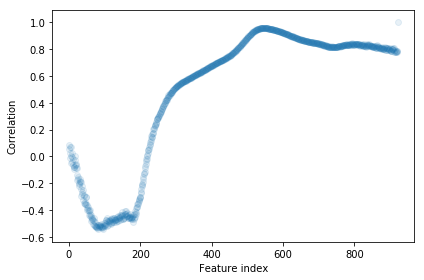

In [133]:
index = [i for i in range(len(corr_matrix))]
plt.scatter(index, corr_matrix["y"], alpha=0.1)
plt.xlabel("Feature index")
plt.ylabel("Correlation")
save_fig("multiclass_corr")
plt.show()

In [134]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(multiclass_df, multiclass_df["y"]):
    mul_train_set = multiclass_df.loc[train_index]
    mul_test_set = multiclass_df.loc[test_index]
print(mul_train_set["y"].value_counts() / len(train_set))
print(mul_test_set["y"].value_counts() / len(test_set))

4    0.5
3    0.5
2    0.5
1    0.5
0    0.5
Name: y, dtype: float64
4    0.5
3    0.5
2    0.5
1    0.5
0    0.5
Name: y, dtype: float64


In [135]:
selected_features = select_features(mul_train_set, wavelength_list, 5)
print("Selected features: ", selected_features)
mul_train_set = mul_train_set[selected_features+["y"]]
mul_train_set.head()

Selected features:  ['wl_453.871', 'wl_454.99199999999996', 'wl_518.706', 'wl_574.432', 'wl_634.521']


wl_453.871  wl_454.99199999999996  wl_518.706  wl_574.432  wl_634.521  y
299       17.18                  32.92        9.33       12.31       50.81  2
407        3.64                  11.27       34.83       61.06       61.57  4
439       -3.03                   7.22        1.35        5.13       44.87  3
74         8.83                   9.06        1.99        5.66       50.77  3
331       -0.52                  12.08       30.08       19.62        9.95  1

Saving figure multiclass_matrix


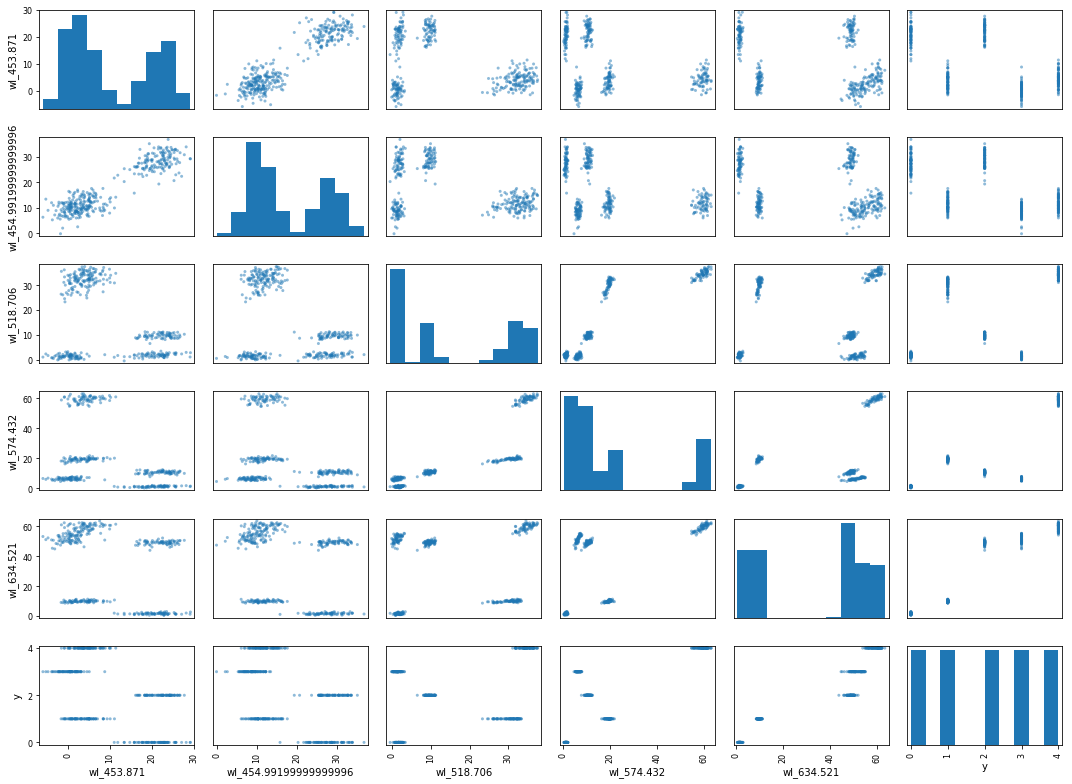

In [137]:
scatter_matrix(mul_train_set, figsize=(15, 11))
save_fig("multiclass_matrix")